## Table of Contents
**About Yelp**	

**Ethical Considerations**

**Original Questions**

**Limitations Relevant to Original Questions**

**Exploring the Dataset**
* Identifying Restaurants and other Eateries
* Diagnosing the Strange Check-In Data	

**Business Star Analysis**	   
* A 1/10 of the review data (600k / 6M):   
* Stars Analysis (States)      	                             
* Stars vs. Count	                                             

**Predicting Whether a Business is Open**	                     
* Random Forest Feature Importance	                         
* Gradient Boosting Feature Importance	                     

**An Attempt at Sentiment Analysis**	                         

**Most Interesting Insights**	                                 

**References**	                                                 

**Appendix**	                                                 
* Json files	                                                 
* Average Star Rating by Category	                             
* Review count by good for kids and noise level	                 
* Predicting Stars from business data	                         
* Feature Importance	                                         

# About Yelp

Yelp is one of the earliest platforms enabling online restaurant reviews (ORRs), but quickly expanded to include other business types. It is now a publicly traded company, headquartered in San Francisco (1). As a crowd-sourced local business review site, their business model was simple: advertising dollars support the platform and company while Yelpers (users) provide reviews of businesses they visit. Not to be left out of the social networking craze, Yelp continues to offer new ways for users to interact with reviews, each other, and businesses. Features include direct messaging, review rating, question answering, picture sharing, and business metadata collection. Competitors include Foursquare, Google, and Facebook.

According to their website, the Yelp Dataset Challenge is “a chance for students to conduct research or analysis on” Yelp data. Round 12 kicked off on August 1, 2018 and runs until the end of the year (2). Using the dataset involves accepting the Dataset Challenge License and Terms, which mostly consists of being a student and using the dataset for academic purposes. 

Ethical considerations for using the data come not from the acquisition of the data, but from analyses the stories that can be told using it and the data elements provided. It’s important to keep in mind that platforms like Yelp are important for businesses because they can live and die on good word-of-mouth or poor reputation management. While the Terms of Service for Yelp clearly relieve Yelp of legal liability for the reviews provided by Yelpers, that doesn’t mean they can sit back and be complacent about the services they provide. To that end, and related to the ethical considerations for analyzing this data set, it’s important to know that this dataset is merely a subset of all the data Yelp owns.


# Ethical Considerations

One must first understand that the dataset is a subset of Yelp’s Recommended Reviews. Their website offers many places for visitors to learn about Recommended Reviews, but only if you’re looking for it. In essence, Yelp analysts engineered recommendation software that is constantly analyzing reviews based on quality, reliability, and user activity (3). Based on their proprietary algorithm, which users don’t get to learn anything about, some reviews aren’t considered for star rating and are hidden from the full list of user-provided reviews. So to rephrase, the dataset provided by Yelp for their Data Challenge is a subset (limited number) of a subset (recommended reviews) of their data. Challenge participants aren’t told how the the dataset was compiled, so analyses and conclusions drawn from them are limited.

A further ethical consideration comes for the data elements included in the set. Any Joe Schmo can access Yelp and see specific user identification information, including profile photos, location information, review stats, friends, and a whole host of other social networking features. The Challenge Dataset, on the other hand, is devoid of most of these relationship elements. The five JSON files comprising the basic challenge are described as follows.

* business.json - Contains business data including location data, attributes, and categories.
* review.json - Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
* user.json - User data including the user's friend mapping and all the metadata associated with the user.
* checkin.json - Checkins on a business.
* tip.json - Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.
* photo.json - Contains photo data including the caption and classification (one of "food", "drink", "menu", "inside" or "outside").


# Original Questions

A question asked by many vacationers or out-of-towners is “where do the locals eat” or “what’s the place you don’t tell the tourists about.” This is not as simple a question as it might seem, as there is both the consideration of distance to said restaurant as well as the idea of the local secret: that place the locals know about but keep “hidden” so as to not allow it to change. Using the data provided by Yelp for the challenge we can begin to look at review networks, considering some of the following questions. This list is by no means exhaustive.

* Do user accounts with a “local” affiliation review “local” restaurants more or less than out-of-town visitors? Local here can be defined geographically using zip codes; Oahu zip codes could be queried for all those beginning 968*.
* If a restaurant gets a positive review by a “local” is it likely get other positive reviews by “locals”?
* Are “local” reviews of restaurants substantively different than visitor reviews? Is one group more or less likely to review a restaurant positively? Can we perform a content analysis on the reviews to see if visitors remark on different restaurant features than locals?
* How many positive reviews are required for a restaurant to “get noticed”? Can we use review timestamps to identify an increase in review activity?
* Can we use GIS data to identify areas that have a high hotel density and compare the local vs. visitor review rates of restaurants in a particular zip code?
* Is there such a thing as a “local” diner review for highly trafficked tourist areas like Waikiki and other similar heavily “touristed” areas in San Francisco, Chicago, Los Angeles, New York, Houston, Philadelphia, Phoenix, San Antonio, San Diego, Dallas, and San Jose? 
* For restaurants which exist in low density review areas (to be determined after an examination of the data), are there differences in users which review said restaurants or in the content of the reviews? In other words, why might some more rural restaurants get more review traffic than others?


# Limitations Relevant to Original Questions

The user.json file is described as having all the user metadata, but it doesn’t include the user’s location or full user name. One can only assume these elements were omitted for user privacy. While this is a good ethical decision by Yelp, it means that our original research questions, which focused on exploring local reviews and restaurants isn’t possible. Businesses have location information (neighborhood, address, city, state, postal code, and latitude and longitude), but there’s no way for us to connect users to specific geographies. 

A further need for restructuring our analysis came when we realized there weren’t any restaurants in Hawaii represented in the dataset. There are other businesses, but not eateries. 


# Exploring the Dataset

## Identifying Restaurants and other Eateries

At this point, we decided to explore the data more wholly to determine what questions we could reasonably attempt to answer given the limitations of the dataset, while continuing to focus on restaurants. Yelp has a lot of restaurant data. However, there is no one specific attribute that says a business is a restaurant as all the descriptors are user generated. One way we thought to distinguish restaurants was to use word embeddings to look at similar ways users might describe foods and drinks in the categories attribute. We then manually listed the top 10 words and used this to search for all restaurants. We found that restaurants make up about 15% of the dataset. And 20% of this subset are bars.

Business check-ins are encoded as nested objects of the day of the week with the key of the hour (using a 24 hr clock) with the count of check-ins for that hour, defined as 14:00 to 14:59. Notice here that check-ins do not include dates, but are summarized as day of the week, so analyses cannot identify seasonal or monthly effects. Saturday and Sunday clearly have more check-ins than typical work days, which makes sense at face value. Given more time during the day when a plurality of people aren’t working, there are more hours available for people to patronize businesses.


<img src="Figures/figure1.png">

Graphing restaurant checkins by time of day initially gave us this graph, making us think there must be a lot of bars and late-night service restaurants in the data. We would have expected to see a different distribution, perhaps with a peak between 12:00 and 14:00 and then another peak between 18:00 and 20:00. Yet we see a clear dip around what we might assume are lunch hours. Is this indicative of Yelper behavior or an error in how we created the chart? If it’s indicative of Yelper behavior (as opposed to general population behavior), we could argue that app check-in behavior is more prominent among Yelpers frequenting bars and other late-night eateries. In other words, the act of checking in is particularly valuable for the types of businesses open late at night.

<img src = "Figure 2.png">

Another explanation might be how the chart was created. Simply graphing the cumulative number of check-ins across a given hour doesn’t account for time zone differences or the effect of Daylight Savings Time. Unfortunately, since check-ins aren’t encoded (in our limited dataset) with dates, we can’t normalize across daylight and standard times. As for accounting for time zone differences (four in the continental United States - Eastern, Central, Mountain, and Pacific), the creation of a “local time” variable could be done by connecting business_id in the checkin.json file with business_id in the business.json file and then generating a function to calculate local time. The problem with this, however, is we don’t know the original time zone in which the data were encoded, so we’d have to make an assumption (for example based on Pacific time since Yelp is headquartered in San Francisco). Alternately, we could limit the analysis to restaurants in Arizona, since the entire state is in the Mountain Time Zone and doesn’t observe Daylight Savings Time. Also there are close to 15,000 restaurants in Arizona, far more than any other state in our dataset.

<img src = "Figure 3.png">

## Diagnosing the Strange Check-In Data

We noticed an over-representation of restaurants in Arizona. Several published papers mention Yelp restaurant reviews in Phoenix, but we couldn’t find any explanation for why Yelp tends to represent Arizona so well in dataset challenges (4-7). 


<img src = "Figure 4.png">
<img src = "Figure 5.png">

Graphing check-in distribution across Arizona was easier to accomplish, so we did that first. Arizona shows roughly the same patterns in check-ins as the rest of the dataset, leading us to conclude there must be something about Yelper behavior explaining the unexpected distribution rather than inconsistencies in time coding.

# Business Star Analysis
## A 1/10 of the Review Data (600k/6M)

We the moved on to an attempt to predict star ratings. We see that most reviews are 5 stars, then 4 stars, followed by 1 stars.

<img src = "Figure 6.png">

## Stars Analysis (States)

California has the highest rated businesses, while New York has the lowest. Which is interesting because Yelp is headquartered in California.


<img src = "Figure 7.png">

## Stars vs. Review Count

Businesses that are 5 star rated, tend to only have 10 reviews. Once they get more, they get dragged down to 4.5 at around 40 reviews. And further dragged down to 4 stars at around 55 reviews. On the other side, a business with 40 reviews is also just as likely to have 3.5 stars. Because most users will give 5 and 4 stars. This is why we see peaks here.


<img src = "Figure 8.png">

# Predicting Whether a Business is Open

Changing direction a bit, we decided to see if it were possible to predict if a business were open or closed using variables from the business.json file. The following analytics were run using the entire range of businesses, rather than focusing on restaurants, eateries, and bars. Most of the businesses in the file were open, but 17% were closed. From this graph, we can see that, in general, most businesses fall in the middle star ratings. While we might have expected to see closed businesses more heavily represented in the 1-2 star ratings, this simply goes to show that just because a business performs well enough to get average ratings doesn’t mean it will perform well enough to stay open. Likewise, a business could get amazing reviews, but still not get enough business to stay open. In other words, star rating can’t be the only predictor of open/closed status.


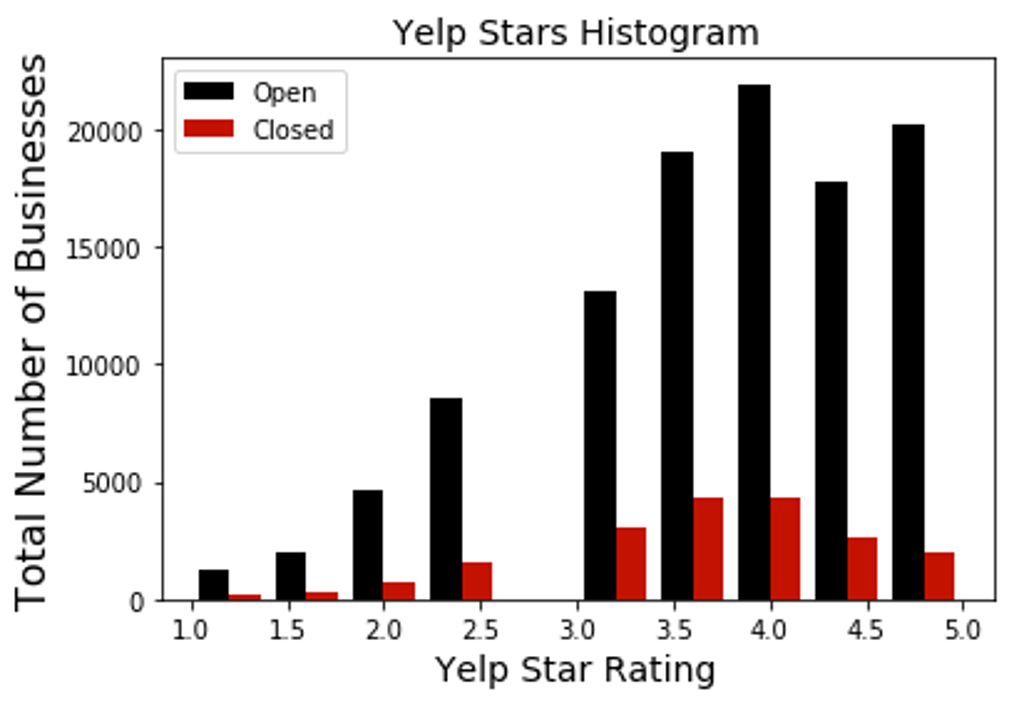

In further exploring the distribution of open and closed status of businesses, we graphed the open/close status with the number of reviews (review_count). Nothing here was too surprising. We see a declining number of businesses overall as the number of reviews increases. One thing we can conclude is that businesses with more than 2,000 reviews are more likely to be open than businesses with fewer than 2,000, and that having more than 5,000 reviews pretty much guarantees a business will be open. Visually this is interesting, but it probably only means that those businesses which have stayed open long enough to get that many reviews have withstood the test of time. Folk wisdom in the restaurant business says you have one year to survive or die and it is probably similar for businesses in general. So what we’re likely seeing here is the effect of time on the number of reviews a business can accumulate, and if a business has the time to accumulate more than 2,000 reviews, it has probably withstood the test of time.

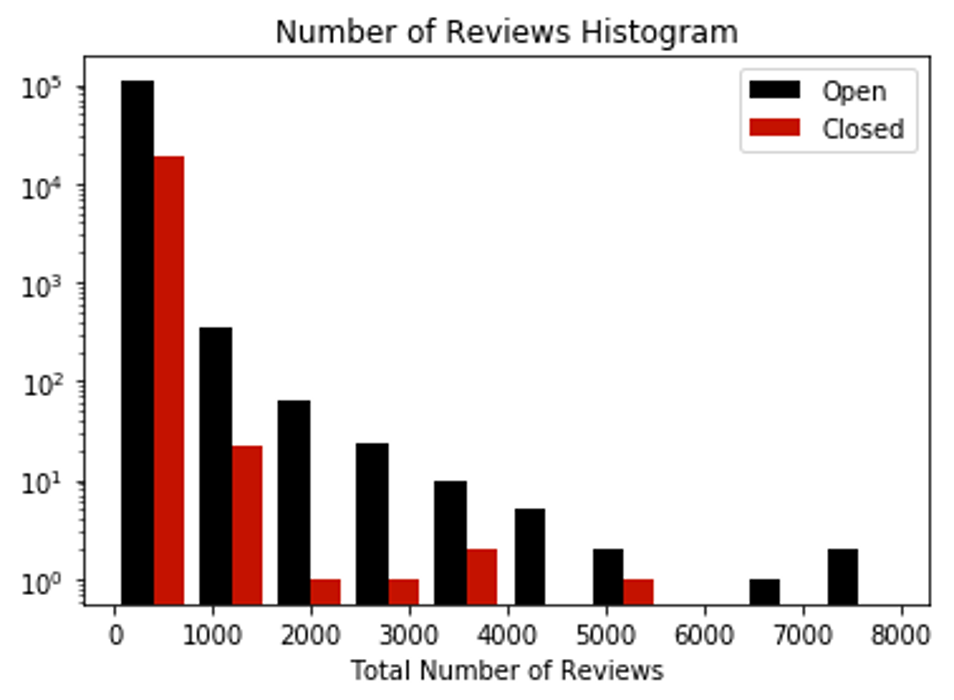

Within the business file there were four values we used to predict whether a business was open or closed: latitude, longitude, review count, and average star rating. We used five classification techniques, with the Gradient Boosting and Random Forest classifiers yielding the best accuracy scores, at 83 and 79% respectively. The ROC curve shown here is a great way of visualizing the relationship between true positive rate and false positive rate for each classifier. It works by plotting the cumulative distribution function of the true positive detection of the y-axis versus the cumulative distribution function of the false positive probability on the x-axis.

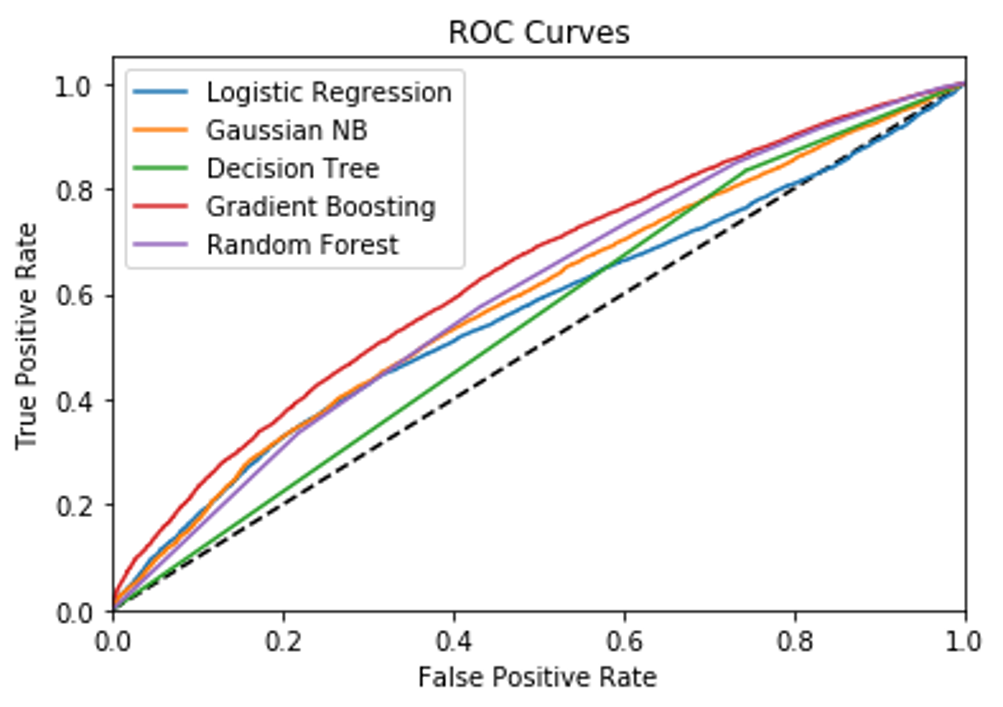

In trying to predict stars, as described above, the most important feature was “city.” Here, we also looked at the important features in the prediction models that were the most accurate. Location played the most important role in both models, similar to previous predictions. This could be meaningful, or it could be an artifact of the dataset. Afterall, in exploring the data we found that restaurants were clustered in larger cities and the more people are available to provide reviews, the more reviews a business will accumulate. An interesting analysis would be to attempt to identify businesses located in smaller population or geographically isolated areas and see if the same feature importances hold true. 

## Random Forest Feature Importance
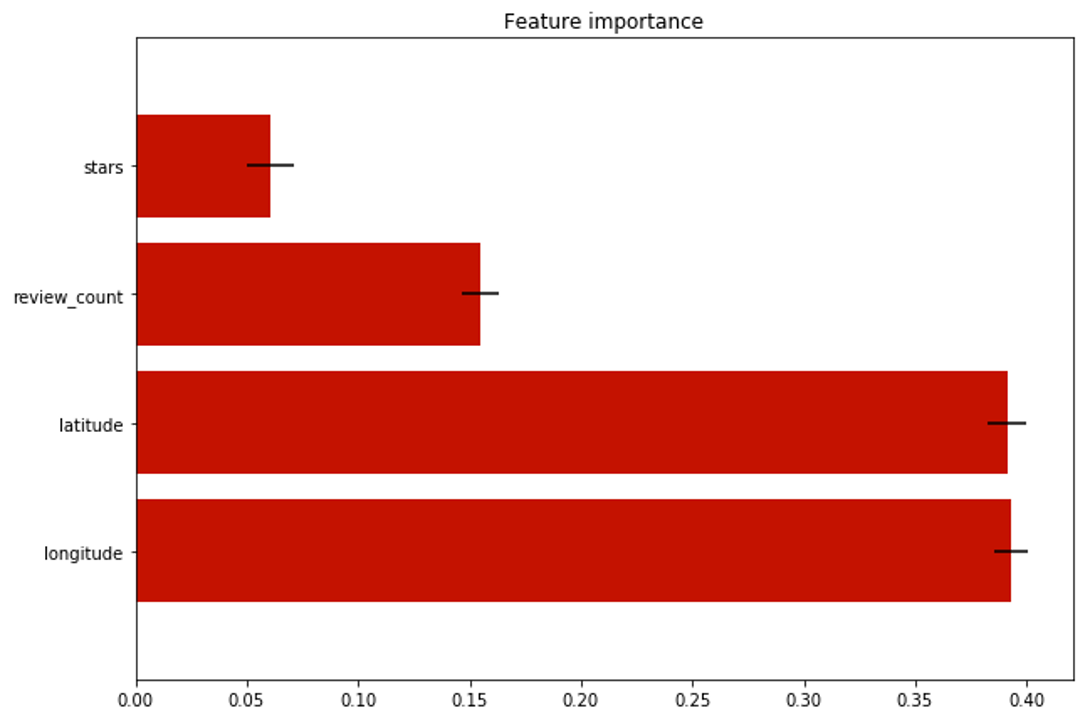

## Gradient Boosting Feature Importance
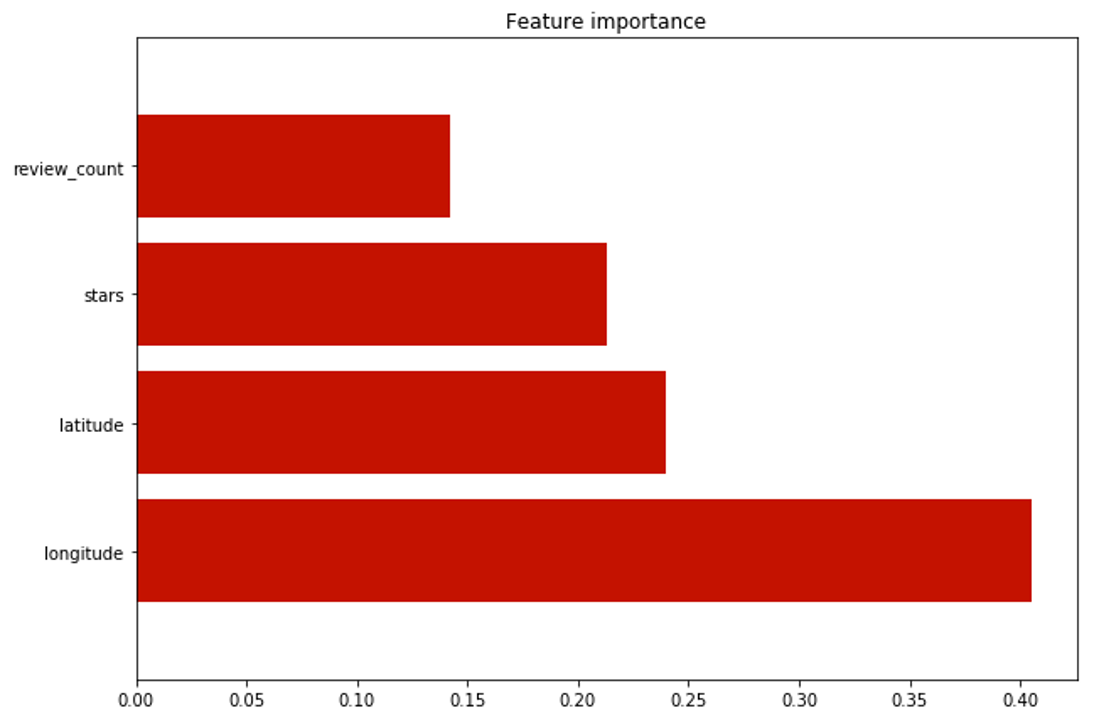

# An Attempt at Sentiment Analysis

Thus far, our analyses have focused on some of the more descriptive aspects of the dataset, but the reviews.json file has the text of almost 6,000,000 reviews, along with a few metadata elements. While review_id is a unique identifier for each review, reviews were also connected with business_id so connecting the files would be possible. We thought it would be interesting to try to run sentiment analysis on the review file using the NLTK corpus. We started this analysis by calculating review text length and graphed it based on the star rating accompanying a review. Below, we see, again, that there are far more 4-5 star reviews than 0-3 star reviews. We also see that most reviews are less than 2,000 characters. If you look closely, you can see see that reviews accompanying a 1-2 star rating are slightly longer than higher star rating reviews. For 5-star reviews, we see an early peak in review length before 1,000 characters. What we can gain from this, perhaps, is that Yelpers will leave longer reviews for lower-rating, using more characters to justify their review, while higher-rated reviews need fewer characters.


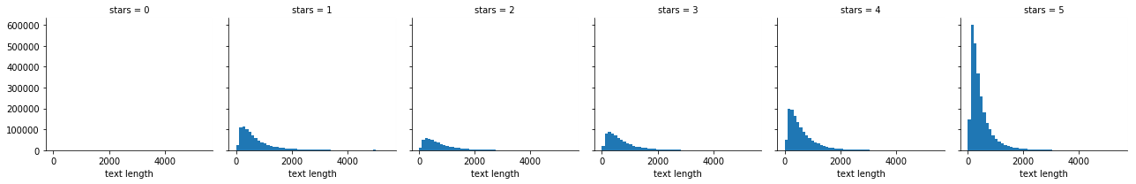

The box plot of star and text length is slightly more helpful in visualizing this distribution. From the plot, it’s much easier to see that 1-2 star ratings have much longer text than 5 star ratings, but there are a lot of outliers. Knowing this, we had to consider that review length might not be a useful feature.

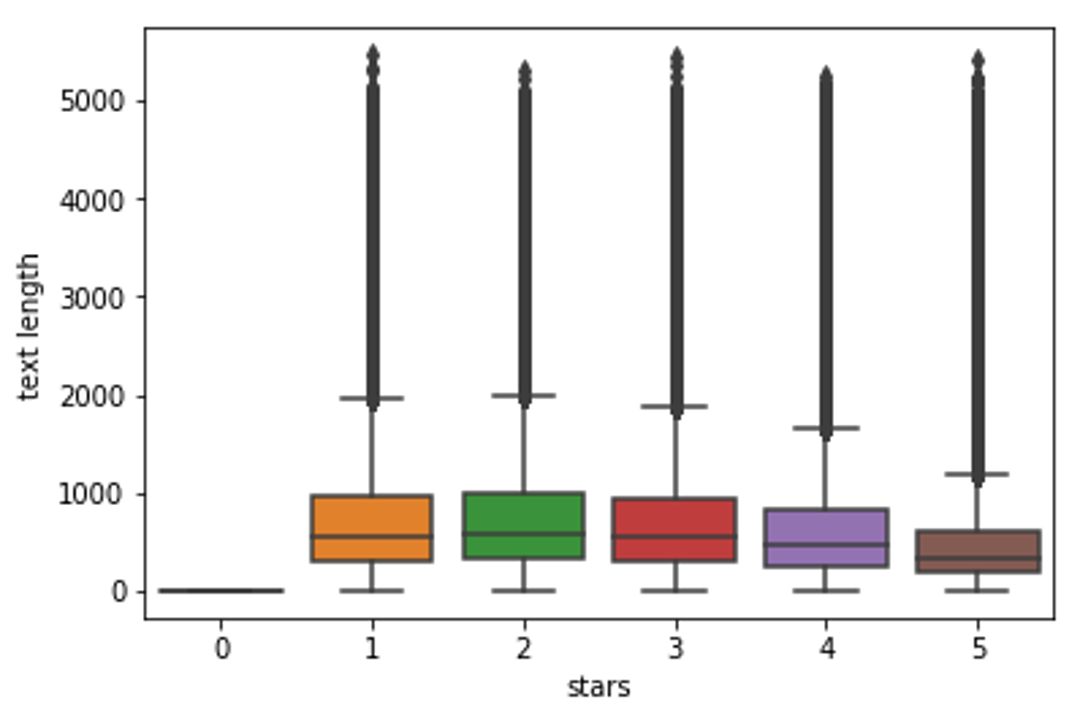

Further exploring this data, we grouped the data by star rating, and attempted to see if there were correlations between other available features. In Yelp, a user can identify a review as cool, useful, or funny. We visualized the correlation with Seaborn’s heatmap.

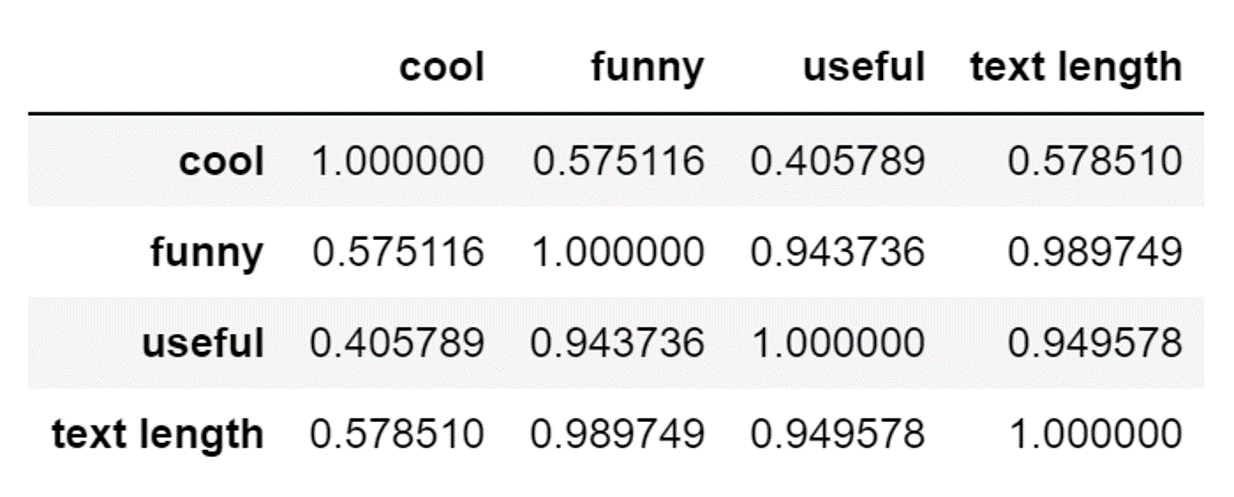
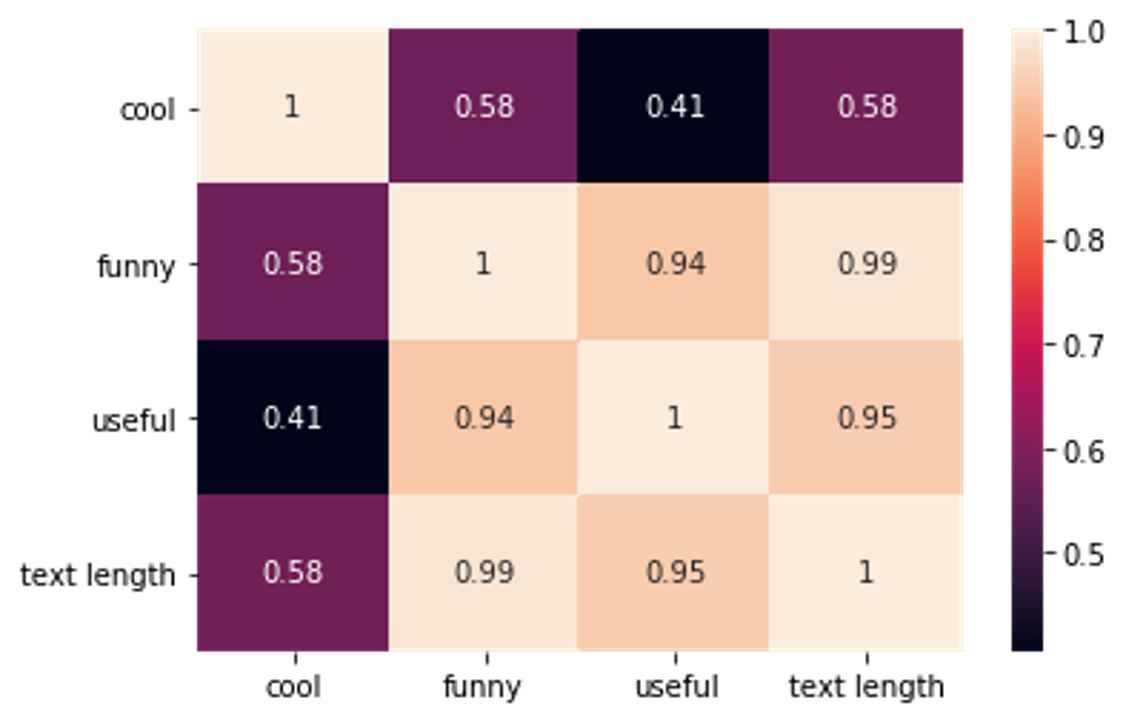

Looking at the heatmap, funny is strongly correlated with useful and text length, and useful is also strongly correlated with text length. All the correlations were positive.

At this point, we were successfully able to load the NLTK stopwords. A sanity check proved that it was working (see below), but when we tried to convert our reviews into vectors (to use Scikit-learn’s CountVectorizer) we simply didn’t have enough computing power to run the analysis, even after limiting the analysis to just 1 and 5 star reviews. 

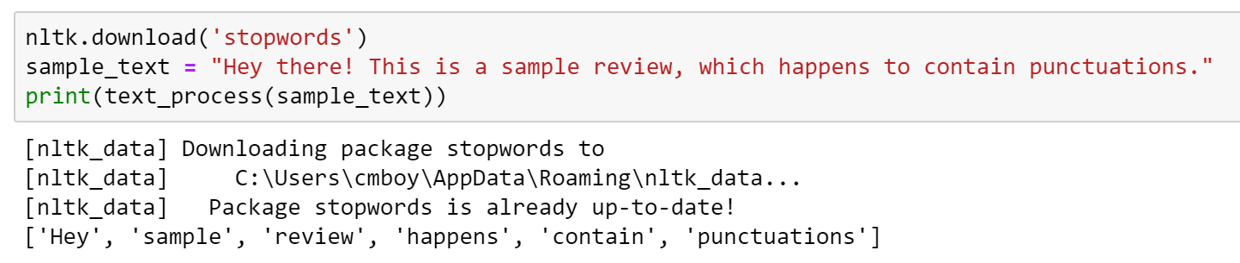

Having used all of our available Google Cloud credit, we decided that while the continued analysis could be interesting, this was simply one example of how big companies with more financial resources and computing power can take advantage of big data. When you have the power and resources to run these kinds of analyses, you can gain insights over your competitors. The rich get richer and the world keeps spinning.

# Most Interesting Insights

First and foremost it’s important to keep in mind that Yelp is only releasing a slice of the available data. Yelp shares different elements in different iterations of their challenge. Some of what they don’t share can obviously be justified as protecting user behavior, but the other differences are annoying. For example, the coding for open/closed was reversed from past datasets to the one we were working with. So attempting to join multiple datasets is unnecessarily difficult. Which isn’t particularly surprising since they’re running a business and want to protect their intellectual property. The Dataset Challenge is both a way of identifying new talent and of drawing attention to their product. While we enjoyed exploring their dataset, there were elements of it we ignored completely, and elements we wound up  not being able to work with. Given what we were able to work with, however, we made a few interesting discoveries.

The dataset shows a lot of check-ins around midnight, reflecting the high percentage of bars in the dataset. The average 5 star business only has 12 reviews. The addition of more reviews pulls the average rating down. Once a business accumulates 2,000 reviews, it is far more likely to be open than closed. In the 2.5 to 4 star range there is a higher percentage of businesses that are closed than open, while under 2.5 and over 4 stars have a higher percentage of open than closed. This may suggest that businesses with lower stars don’t have as many reviews and are just starting out. A majority of the businesses in the dataset are located in Nevada and Arizona. California has the most highly rated businesses.

In general, it is difficult to predict the average star rating for a business given the available variables. However, given location, stars, and review count, we were able to predict whether a business is open/close with high accuracy. In terms of interface design, the most prominent features of the Yelp platform are the location, the reviews themselves, and the number of reviews. These are the features someone using the application will zero in on most quickly. 

Interestingly, in the course of exploring the dataset, we came to discover that Yelp has a proprietary algorithm running behind the scenes, identifying what they call recommended reviews (8). Their explanation of how a review becomes recommended is limited, but it amounts to a calculus of the interactions a Yelper has with other Yelpers, how often they submit reviews, and the content of their reviews. Only recommended reviews were included as part of the dataset, so we couldn’t actually do any analysis on these unrecommended reviews and how they compare with included reviews. The bottom line is that like any business Yelp is selling a product and that users need to be aware of the limitations of that product when using the platform. We rely on the power of statistics, believing that a restaurant with over 400 reviews, most of which appear to be 4-5 stars, will probably be a good dining experience. The more intrepid among us may even go on to read some of the most recent reviews, looking for specific language which jives with our expectations. We may even intentionally look at the lower star reviews, considering when they were posted and what specifically was said. We’re trying to make a snap decision based on the power of crowdsourced opinions. And sometimes we have a great meal. Sometimes we don’t, because no matter how much statistical power there is, reducing an experience to quantifiable features is difficult. Which is exactly why Yelp publishes this challenge - as a way of attempting to identify quantifiable patterns to make its business model better.


## References
1. https://en.wikipedia.org/wiki/Yelp#Origins_(2004%E2%80%932009)
2. https://www.yelp.com/dataset/challenge
3. https://www.yelp-support.com/article/Why-would-a-review-not-be-recommended?l=en_US
4. Chhabra, D., Lee, W., and Zhao, S. (2013). Epitomizing the “other” in ethnic eatertainment experiences. Leisure/Loisir 37(4): 361-378. 
5. Ju, C. and Wang, W. (2017). CORALS: Who are my potential new customers? Tapping into the wisdom of customers’ decisions. 
6. Lakshmanan, C., Nagarajan, P., and Narayanan, S. Unbiased restaurant recommendation using Yelp review data. https://cseweb.ucsd.edu/classes/wi17/cse258-a/reports/a078.pdf. 
7. Sun, Y. and Paule, J. (2017). Spatial analysis of users-generated ratings of yelp venues. Open Geospatial Data, Software and Standards 2(1): 1-9.
8. https://www.yelp-support.com/Recommended_Reviews


# Appendix

## Json Files
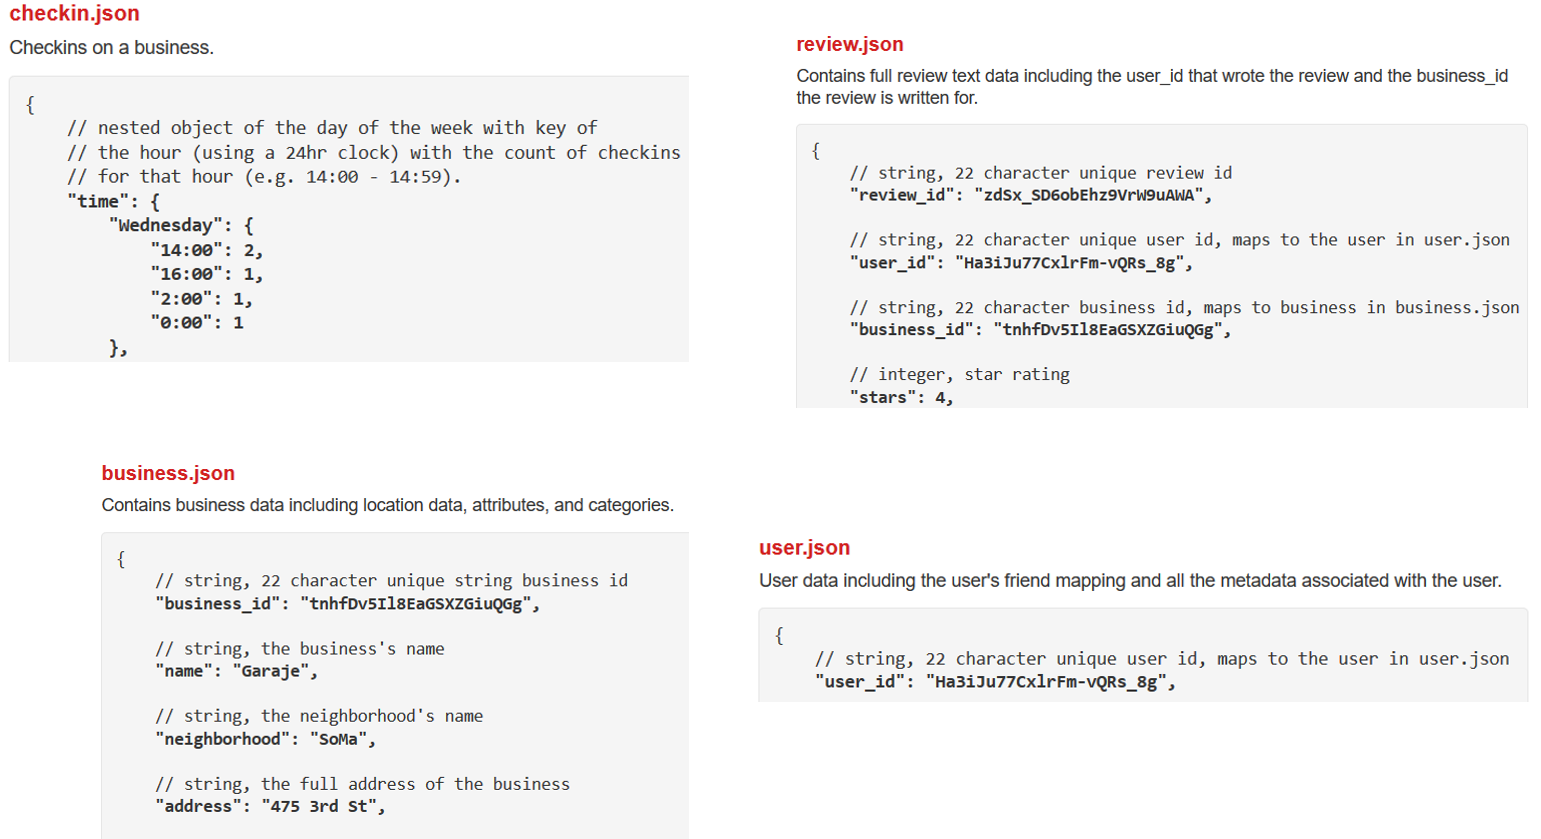

## Average Star Rating by Category

We wanted to analyze what the categories that XGBoost thought were most important, looked like in terms of average stars. In general, there is not much difference across the categories. -1 is false, 0 is missing, 1 is true.

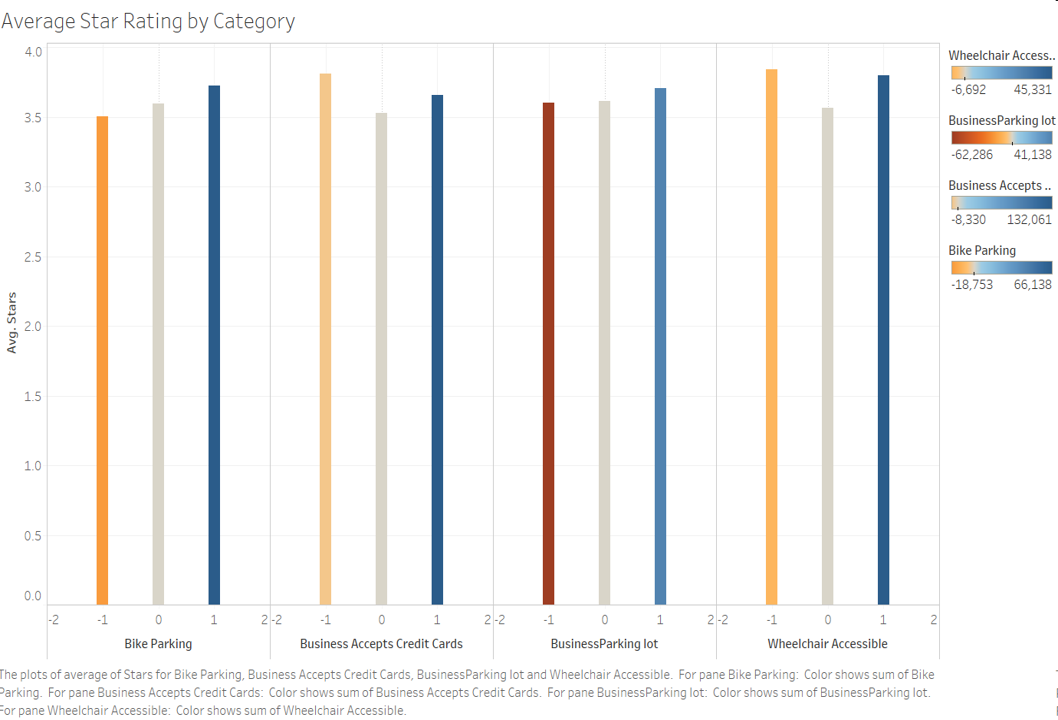

## Review Count by Good_for_Kids and Noise_Level

Looking further at review count, we wanted to see, what categories result in more reviews. We can see that businesses that are good for kids have more reviews. Along with average noise level. The other interesting thing is the amount of missing data, which is inherent in the json format and platform. This makes it difficult in general to form useful insights.

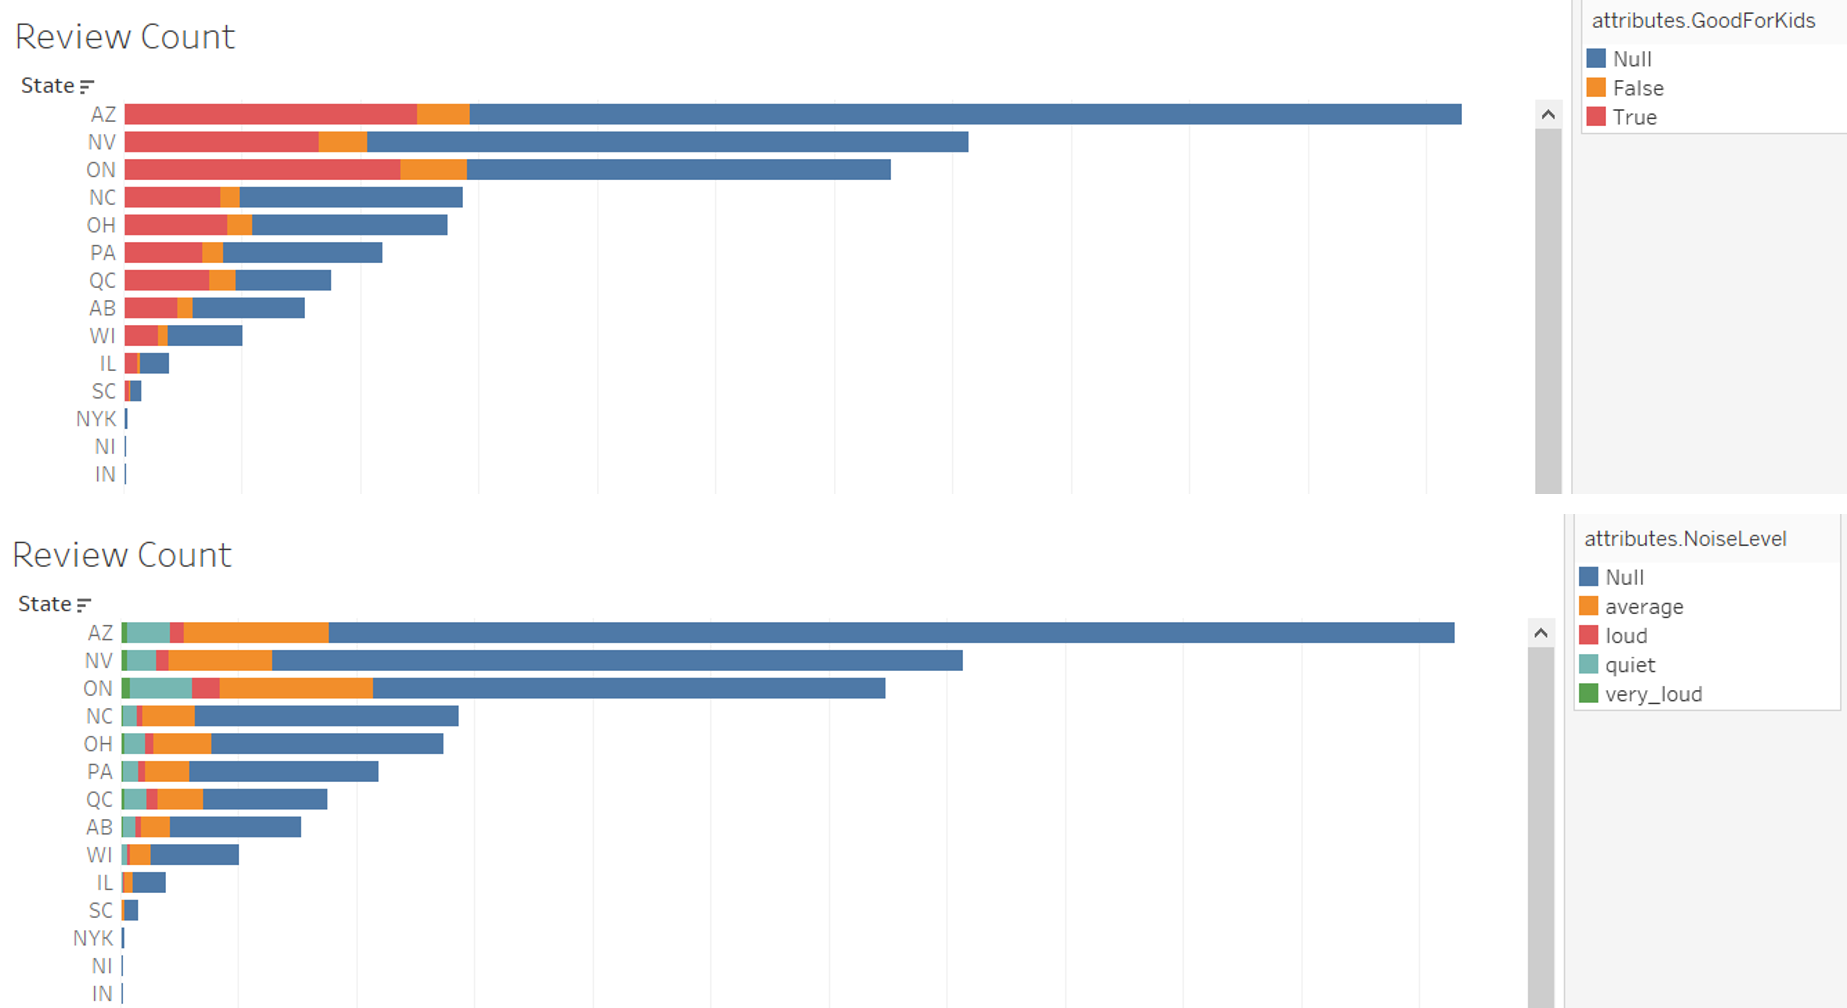

## Predicting Stars from Business Data

We thought one way to predict stars using business attributes was to determine what features are prominent for high star businesses. We decided to use extreme gradient boosted decision trees. To do this the columns had to be broken down to categorical variables and then one hot encoded into numeric variables, creating a couple thousand columns.

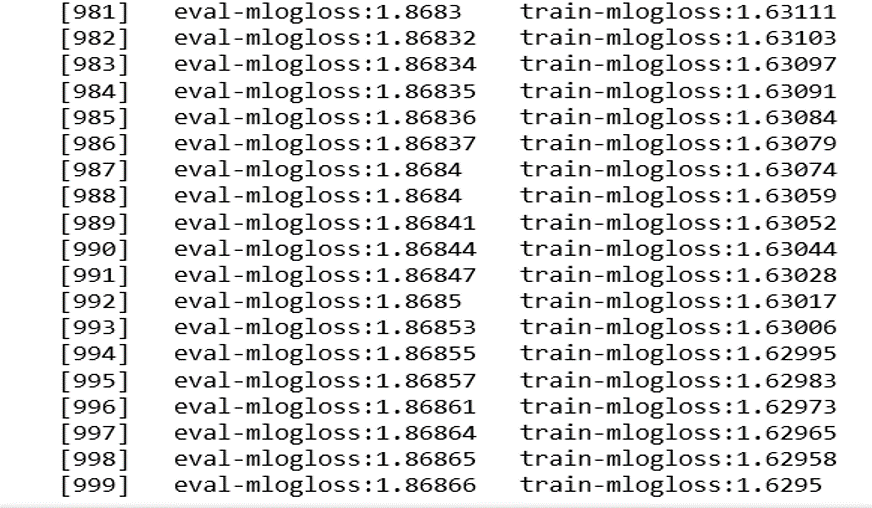

## Feature Importance

It turns out that city is the most important feature by far. Followed by bike parking, accepting credit cards, and so forth.

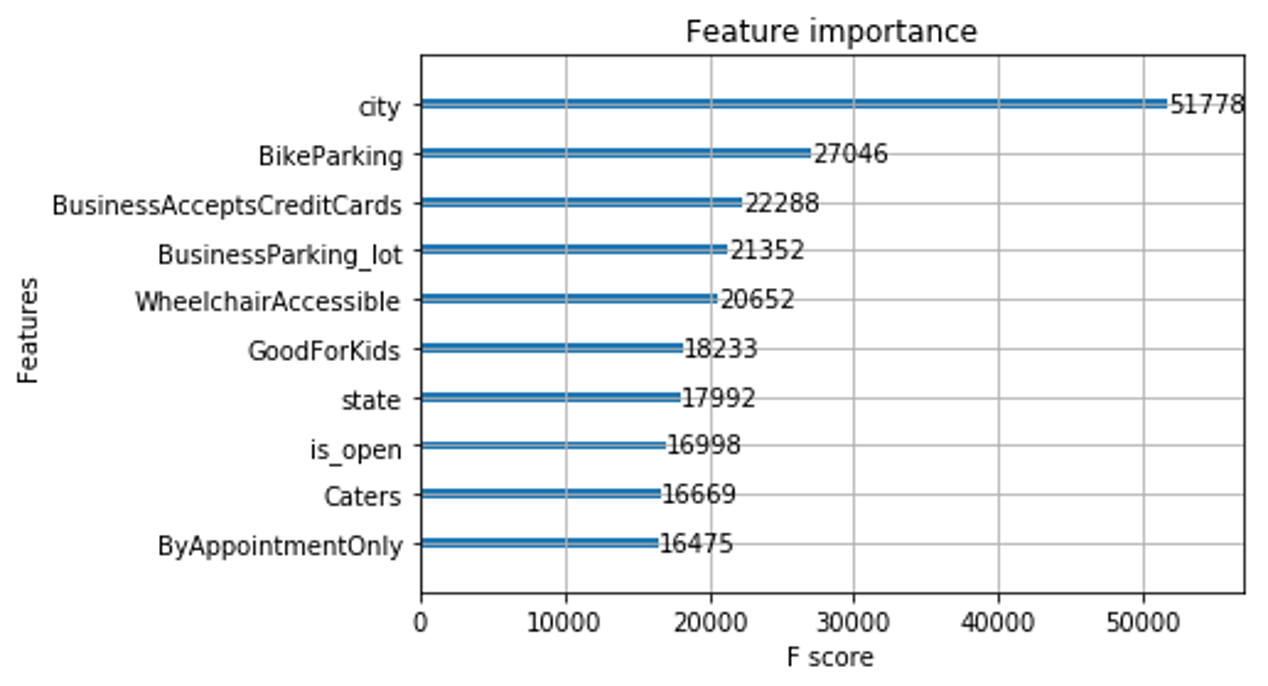